In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

from jcopml.plot import plot_missing_value 

from scipy.stats import multivariate_normal

c:\Minicoda_3\envs\jcopml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("CCGENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


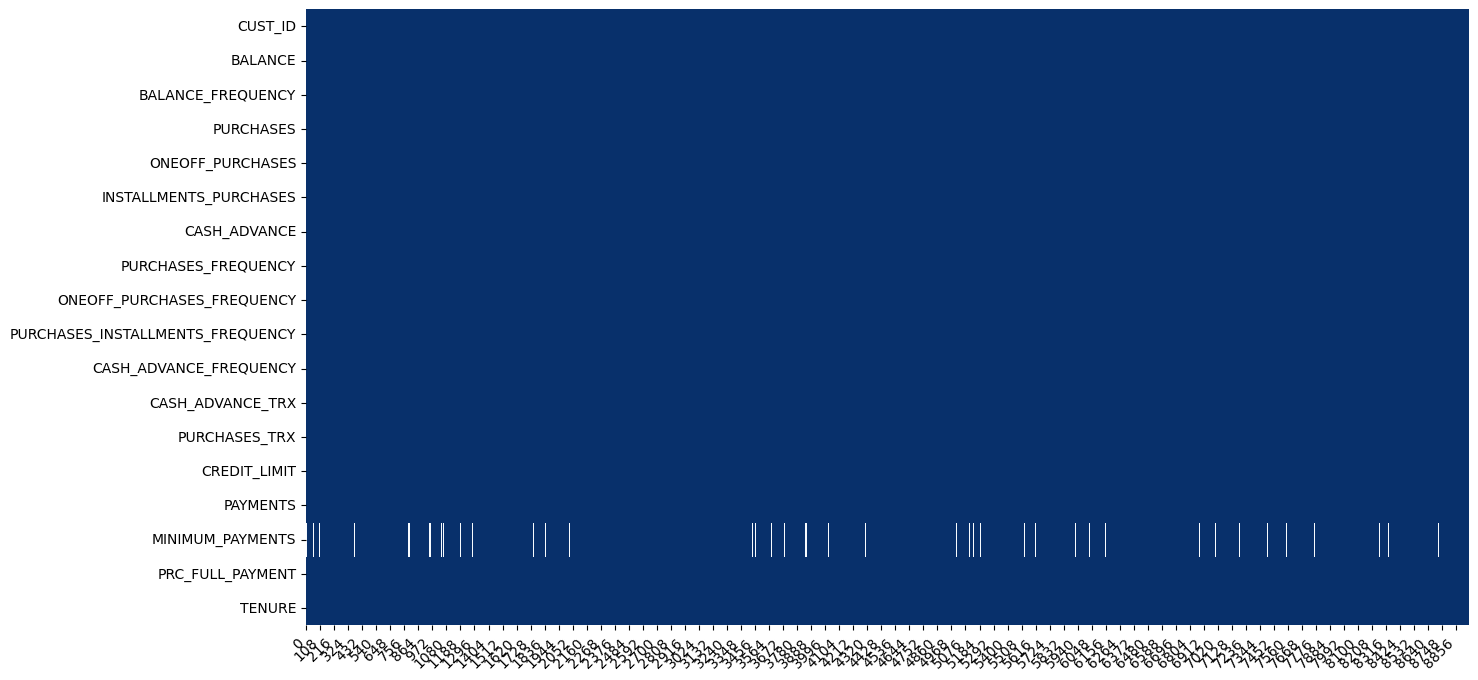

In [4]:
plot_missing_value(data)

In [5]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
data = data.dropna()

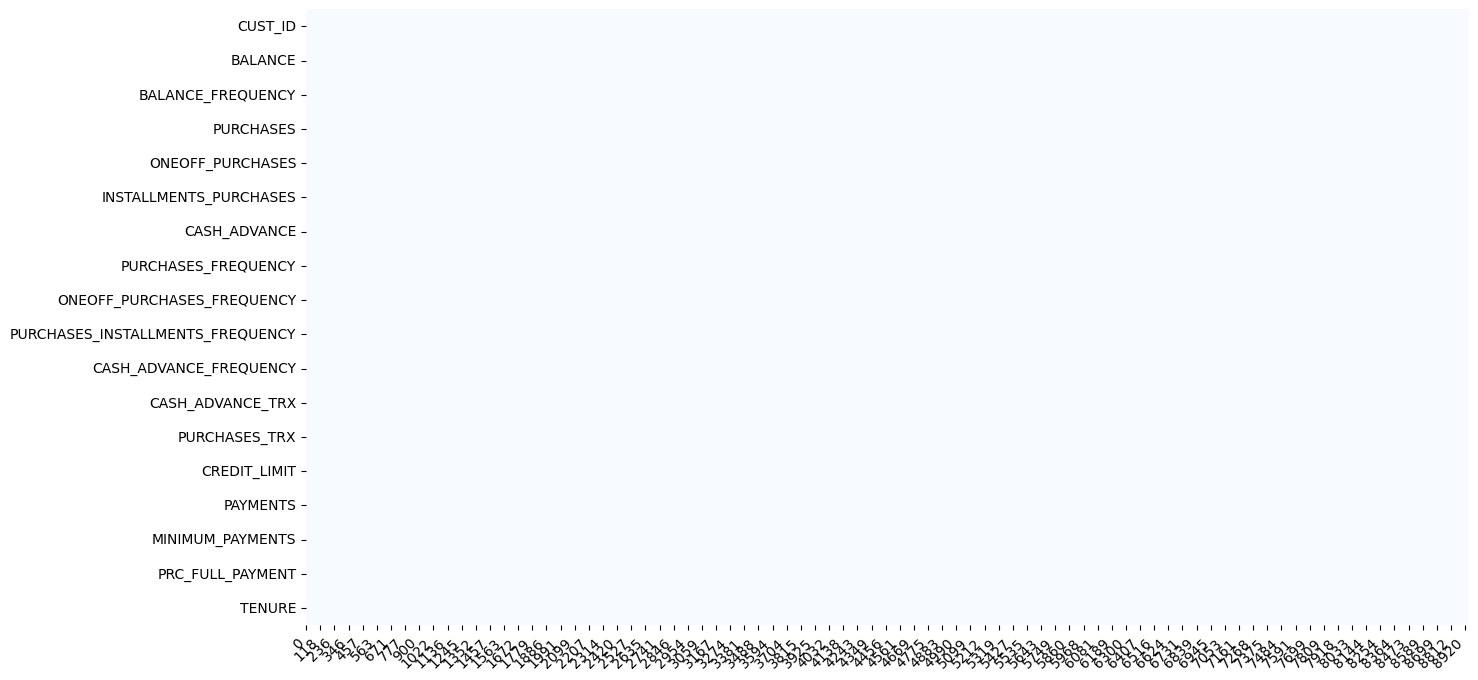

In [7]:
plot_missing_value(data)

Silhouette score for clustering 

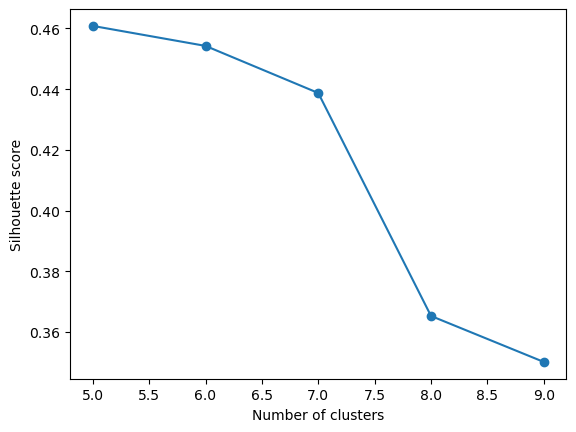

In [8]:
data = data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]
silhouette_scores = []
for k in range(5,10):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, labels))

plt.plot(range(5,10), silhouette_scores, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [9]:
print(data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]])

          BALANCE  PURCHASES  CREDIT_LIMIT
0       40.900749      95.40        1000.0
1     3202.467416       0.00        7000.0
2     2495.148862     773.17        7500.0
4      817.714335      16.00        1200.0
5     1809.828751    1333.28        1800.0
...           ...        ...           ...
8943     5.871712      20.90         500.0
8945    28.493517     291.12        1000.0
8947    23.398673     144.40        1000.0
8948    13.457564       0.00         500.0
8949   372.708075    1093.25        1200.0

[8636 rows x 3 columns]


In [10]:
data[data["CREDIT_LIMIT"] > 5000]

,BALANCE,PURCHASES,CREDIT_LIMIT
1,3202.467416,0.00,7000.0
2,2495.148862,773.17,7500.0
6,627.260806,7091.01,13500.0
8,1014.926473,861.49,7000.0
9,152.225975,1281.60,11000.0
...,...,...,...
8769,116.581583,1045.14,9000.0
8774,2585.246439,338.00,9000.0
8813,3335.053583,0.00,7000.0
8857,2330.222764,1320.00,10000.0


In [11]:
data.iloc[3:5]

,BALANCE,PURCHASES,CREDIT_LIMIT
4,817.714335,16.00,1200.0
5,1809.828751,1333.28,1800.0


In [12]:
data.iloc[2:5]

,BALANCE,PURCHASES,CREDIT_LIMIT
2,2495.148862,773.17,7500.0
4,817.714335,16.00,1200.0
5,1809.828751,1333.28,1800.0


In [13]:
n_clusters = 5 

INITIALIAZE MEANS, COVARIANCE, AND MIXING COEFFICIENT BASED ON K-MEANS PARAMETERS

In [14]:
# kmeans
kmeans = KMeans(n_clusters, random_state=0)
kmeans.fit(data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]])
mu= kmeans.cluster_centers_

print("Pusat klaster (mu):")
print(mu)

Pusat klaster (mu):
[[  800.0799614    529.6802104   2088.34601473]
 [ 1333.56088855  2668.48413793 11661.37931034]
 [ 1952.08931907  1244.96129668  6160.68564181]
 [ 5629.78786614 25434.96965517 16106.89655172]
 [ 7433.70379375  1572.12398551 11390.2173913 ]]


In [15]:
# matriks kovariansi
sigma = [np.cov(data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]][kmeans.labels_ == j].T) for j in range(n_clusters)]

print("Matriks kovariansi (sigma) dari data:")
print(sigma)


Matriks kovariansi (sigma) dari data:
[array([[609280.42574421, -32187.18292785, 133342.62769523],
       [-32187.18292785, 591626.68675878,  88289.9530072 ],
       [133342.62769523,  88289.9530072 , 945766.13592624]]), array([[1965828.41971713, 1224269.98141071, -650738.19255928],
       [1224269.98141071, 9010169.25777326, -565105.55507198],
       [-650738.19255928, -565105.55507198, 8525778.45707012]]), array([[3073189.70168422, -317403.93617339,  -88915.50547975],
       [-317403.93617339, 2740370.44762705, -215182.35256876],
       [ -88915.50547975, -215182.35256876, 1782607.08035492]]), array([[1.93938822e+07, 4.42403644e+06, 2.91196095e+03],
       [4.42403644e+06, 7.87906196e+07, 5.43751157e+06],
       [2.91196095e+03, 5.43751157e+06, 2.81313793e+07]]), array([[5187741.49683301,  844637.25524924, 3275775.8320465 ],
       [ 844637.25524924, 5646840.78435944, 1382980.43120692],
       [3275775.8320465 , 1382980.43120692, 8919513.37565846]])]


In [16]:
# phi mixing coefficient
phi = (1 + np.sqrt(5)) / 2 

phis = []
for cov_matrix in sigma:
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    phi_cluster = eigenvalues[0] / eigenvalues[1] 
    phis.append(phi_cluster)

print("Nilai Phi untuk setiap klaster:")
print(phis)

Nilai Phi untuk setiap klaster:
[1.9648133858712384, 0.17802824651613888, 1.2503503384709636, 4.183647186539263, 3.4384540692909753]


Initialize log likelihood

In [17]:
pi = [1/n_clusters] * n_clusters

log_likelihood = 0

for i in range(len(data)):
    likelihood = 0
    for j in range(n_clusters):
        likelihood += pi[j] * multivariate_normal.pdf(data.iloc[i][["BALANCE", "PURCHASES", "CREDIT_LIMIT"]], mean=mu[j], cov=sigma[j])
    log_likelihood += np.log(likelihood)

print("Log-Likelihood:", log_likelihood)

Log-Likelihood: -231111.25743188657


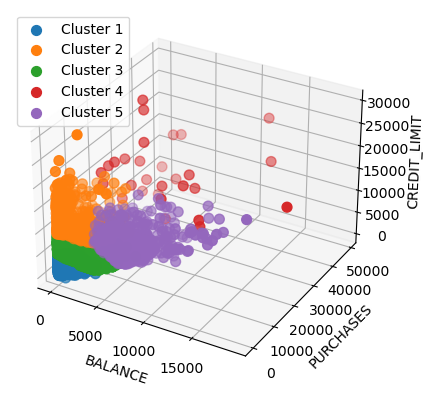

In [18]:
X = data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    cluster_data = X[kmeans.labels_ == i]
    ax.scatter(cluster_data["BALANCE"], cluster_data["PURCHASES"], cluster_data["CREDIT_LIMIT"], label=f'Cluster {i+1}', s=50)

ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
ax.set_zlabel("CREDIT_LIMIT")
ax.legend()

plt.show()